In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [5]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(87439, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [8]:
target = '연희동'
target_purpose = '2종일반'

In [9]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(220, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
23220,서울특별시 서대문구 연희동,519-40,제2종일반주거지역,8m미만,2020-05-27,19.20,43300.0,2255.208333,7455.233880,연립/다세대,35.0
32900,서울특별시 서대문구 연희동,519-85,제2종일반주거지역,8m미만,2018-09-29,12.53,24000.0,1915.403033,6331.910615,연립/다세대,31.0
23219,서울특별시 서대문구 연희동,519-40,제2종일반주거지역,8m미만,2019-07-13,19.20,29500.0,1536.458333,5079.200911,연립/다세대,34.0
8572,서울특별시 서대문구 연희동,1**,제2종일반주거,25m미만,2020-12-15,175.20,250000.0,1426.940639,4717.158961,상업/업무,50.0
29449,서울특별시 서대문구 연희동,520-8,제2종일반주거지역,8m미만,2021-01-05,50.67,72000.0,1420.959147,4697.385435,연립/다세대,34.0


In [17]:
target_df = target_df.sort_values(['단가(평)'], ascending=False)
target_df.head(100)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
23220,서울특별시 서대문구 연희동,519-40,제2종일반주거지역,8m미만,2020-05-27,19.20,43300.0,2255.208333,7455.233880,연립/다세대,35.0
32900,서울특별시 서대문구 연희동,519-85,제2종일반주거지역,8m미만,2018-09-29,12.53,24000.0,1915.403033,6331.910615,연립/다세대,31.0
23219,서울특별시 서대문구 연희동,519-40,제2종일반주거지역,8m미만,2019-07-13,19.20,29500.0,1536.458333,5079.200911,연립/다세대,34.0
8572,서울특별시 서대문구 연희동,1**,제2종일반주거,25m미만,2020-12-15,175.20,250000.0,1426.940639,4717.158961,상업/업무,50.0
29449,서울특별시 서대문구 연희동,520-8,제2종일반주거지역,8m미만,2021-01-05,50.67,72000.0,1420.959147,4697.385435,연립/다세대,34.0
10916,서울특별시 서대문구 연희동,520-39,제2종일반주거지역,8m미만,2019-06-16,19.32,25500.0,1319.875776,4363.225543,연립/다세대,33.0
5363,서울특별시 서대문구 연희동,1**,제2종일반주거,25m미만,2018-10-01,175.20,210000.0,1198.630137,3962.413527,상업/업무,48.0
5364,서울특별시 서대문구 연희동,1**,제2종일반주거,25m미만,2018-10-01,175.20,210000.0,1198.630137,3962.413527,상업/업무,48.0
5365,서울특별시 서대문구 연희동,1**,제2종일반주거,25m미만,2018-10-01,175.20,210000.0,1198.630137,3962.413527,상업/업무,48.0
5361,서울특별시 서대문구 연희동,1**,제2종일반주거,25m미만,2018-07-10,40.30,47000.0,1166.253102,3855.382010,상업/업무,48.0


In [18]:
target_df.tail(100)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
11059,서울특별시 서대문구 연희동,719-5,제2종일반주거지역,25m이상,2017-10-13,62.54,27000.0,431.723697,1427.185721,연립/다세대,37.0
34831,서울특별시 서대문구 연희동,185-3,제2종일반주거지역,25m미만,2019-10-03,32.40,13900.0,429.012346,1418.222577,연립/다세대,33.0
11047,서울특별시 서대문구 연희동,724-9,제2종일반주거지역,8m미만,2018-02-10,40.35,17300.0,428.748451,1417.350198,연립/다세대,38.0
11032,서울특별시 서대문구 연희동,168-0,제2종일반주거지역,12m미만,2017-09-24,81.78,35000.0,427.977501,1414.801602,연립/다세대,31.0
34835,서울특별시 서대문구 연희동,533-80,제2종일반주거지역,8m미만,2019-01-28,34.00,14500.0,426.470588,1409.820074,연립/다세대,33.0
11028,서울특별시 서대문구 연희동,724-20,제2종일반주거지역,8m미만,2017-06-30,38.96,16600.0,426.078029,1408.522356,연립/다세대,31.0
11023,서울특별시 서대문구 연희동,724-20,제2종일반주거지역,8m미만,2017-06-30,38.96,16600.0,426.078029,1408.522356,연립/다세대,31.0
23214,서울특별시 서대문구 연희동,339-62,제2종일반주거지역,8m미만,2016-01-14,48.92,20800.0,425.183974,1405.566803,연립/다세대,30.0
11057,서울특별시 서대문구 연희동,719-5,제2종일반주거지역,25m이상,2017-07-10,62.54,26500.0,423.728814,1400.756356,연립/다세대,37.0
11031,서울특별시 서대문구 연희동,168-0,제2종일반주거지역,12m미만,2016-12-28,81.78,34500.0,421.863536,1394.590150,연립/다세대,30.0


<AxesSubplot:title={'center':'2015~최신 연희동 2종일반 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 220건의 단가 산포도와 회귀선'}, xlabel='번지', ylabel='단가(평)'>

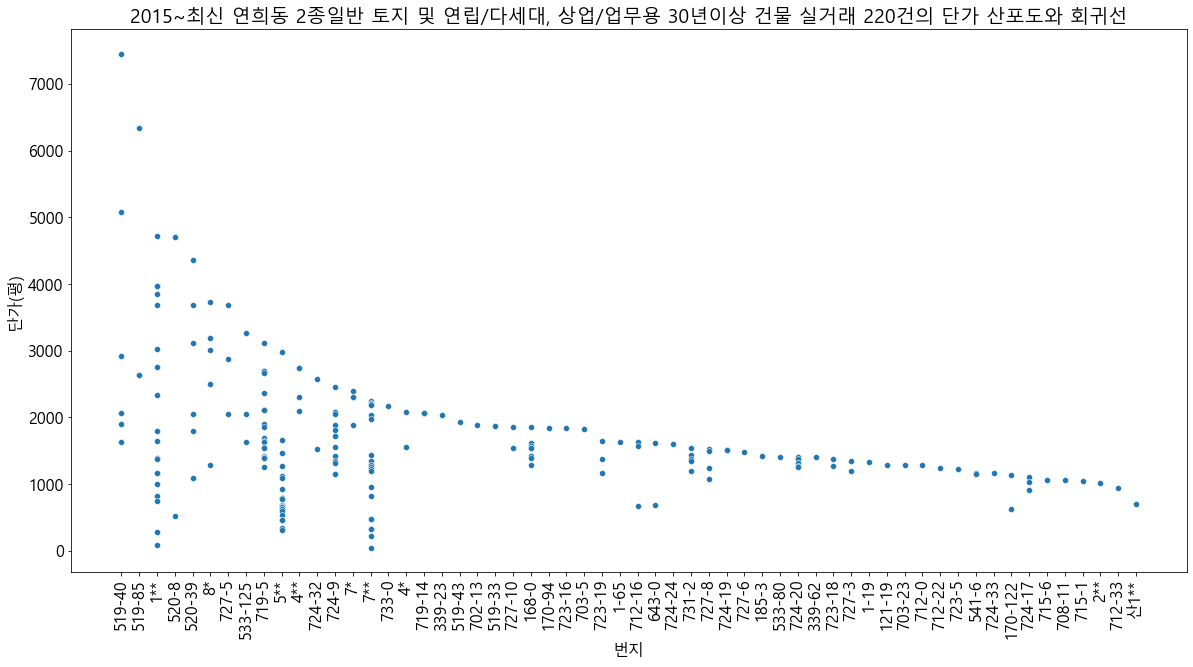

In [23]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose, target_df.shape[0]))
plt.xticks(rotation=90)
sns.scatterplot(x=target_df['번지'].apply(str), y=target_df['단가(평)'])

<AxesSubplot:title={'center':'2015~최신 연희동 2종일반 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 220건의 단가 산포도와 회귀선'}, ylabel='단가(평)'>

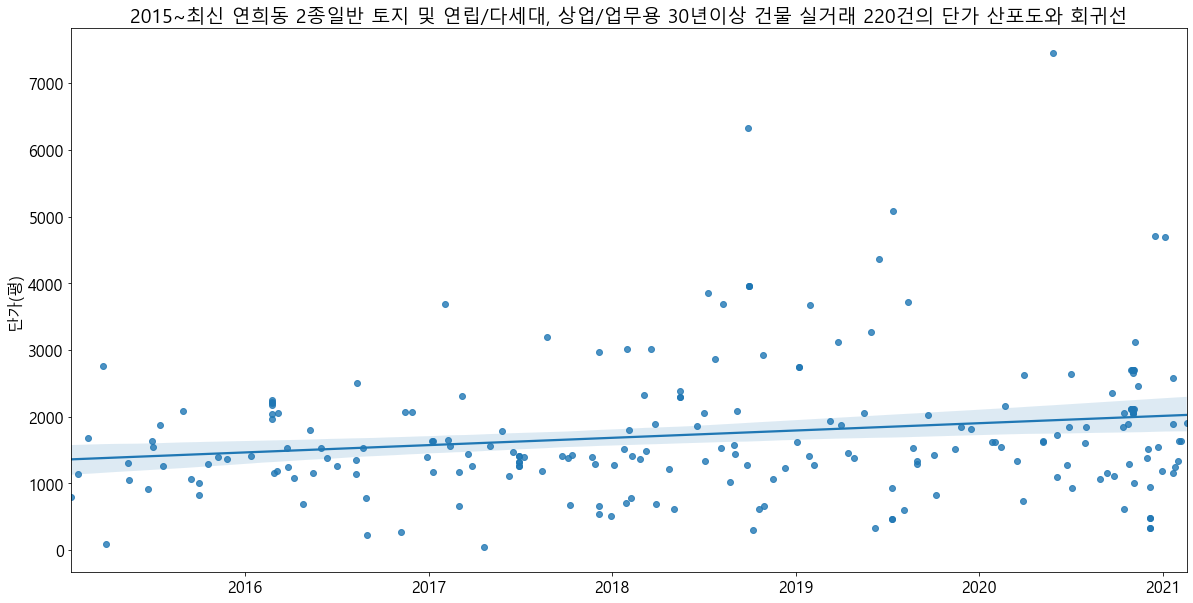

In [12]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose, target_df.shape[0]))
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])

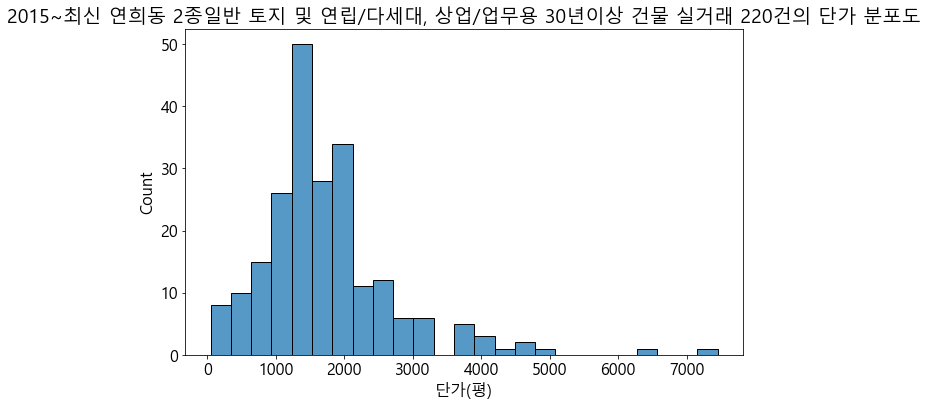

거래량: 220.0
평균: 1750.0739758991947
표준편차: 1011.1394066282504
최소: 44.67277027027027
25분위: 1191.803056061526
중간값: 1534.727044859903
75분위: 2114.349216501439
최대: 7455.233880208334


<Figure size 432x288 with 0 Axes>

In [13]:
f, ax = plt.subplots(figsize=(10,6))
plt.title('2015~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])

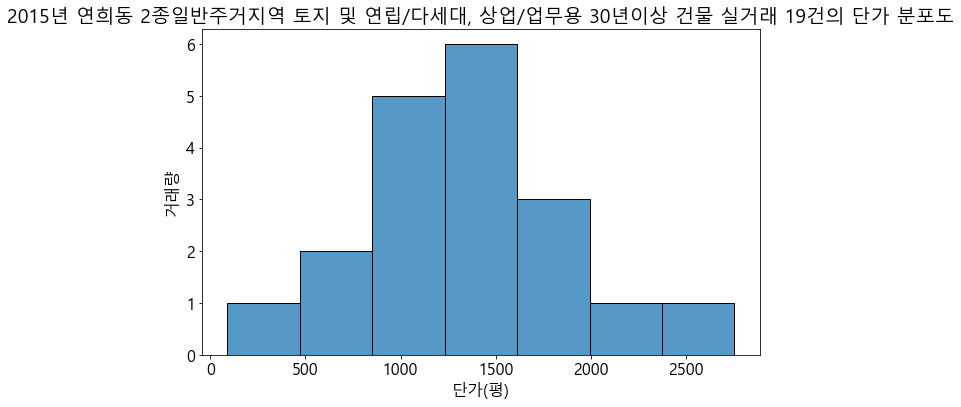

거래량: 19.0
평균: 1320.478246451264
표준편차: 564.2862870127292
최소: 89.256195
25분위: 1028.163716880342
중간값: 1286.29766536965
75분위: 1594.727678243574
최대: 2754.8208333333337


<Figure size 432x288 with 0 Axes>

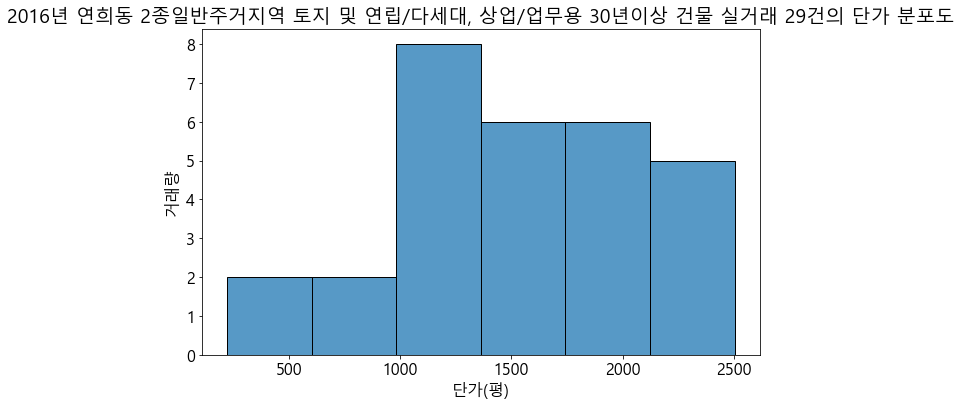

거래량: 29.0
평균: 1506.22332304403
표준편차: 589.1240544680659
최소: 223.25981602235683
25분위: 1161.933339848485
중간값: 1405.5668029435817
75분위: 2048.701660882499
최대: 2501.7862844702468


<Figure size 432x288 with 0 Axes>

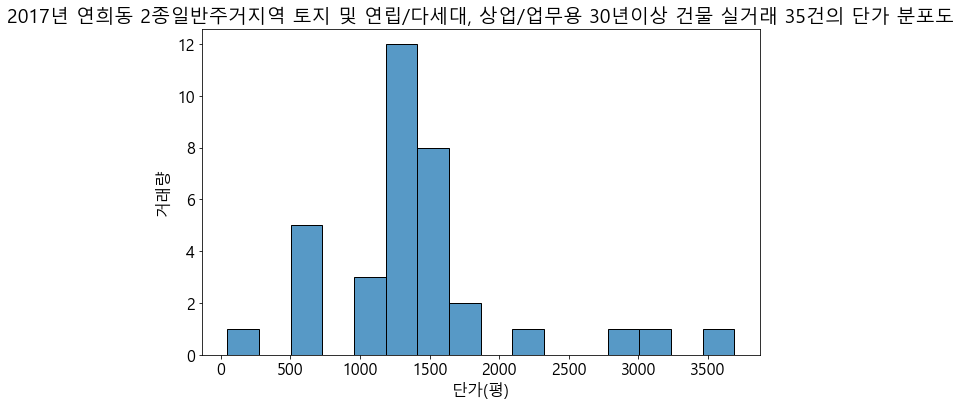

거래량: 35.0
평균: 1433.9362768634298
표준편차: 715.5646853007175
최소: 44.67277027027027
25분위: 1180.1260188289914
중간값: 1392.8275463703233
75분위: 1561.8125954277355
최대: 3691.323200992556


<Figure size 432x288 with 0 Axes>

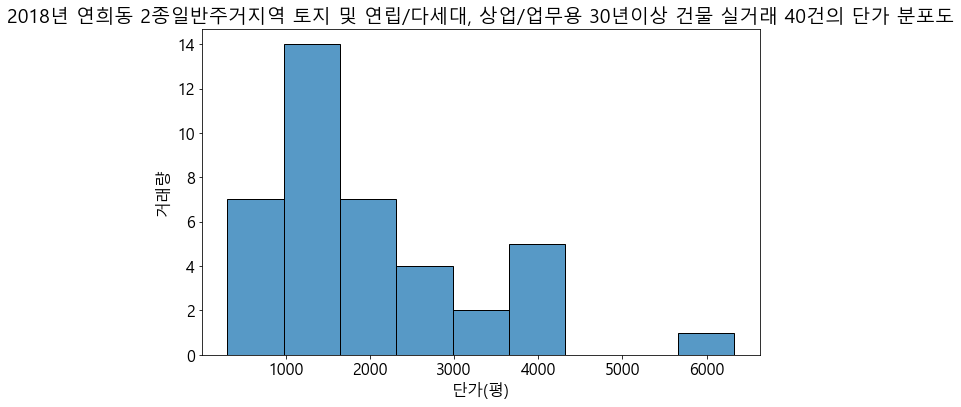

거래량: 40.0
평균: 1993.8952988826416
표준편차: 1246.5634890123454
최소: 304.48019736842105
25분위: 1223.9667632767869
중간값: 1555.970171331297
75분위: 2507.997158167568
최대: 6331.910614525141


<Figure size 432x288 with 0 Axes>

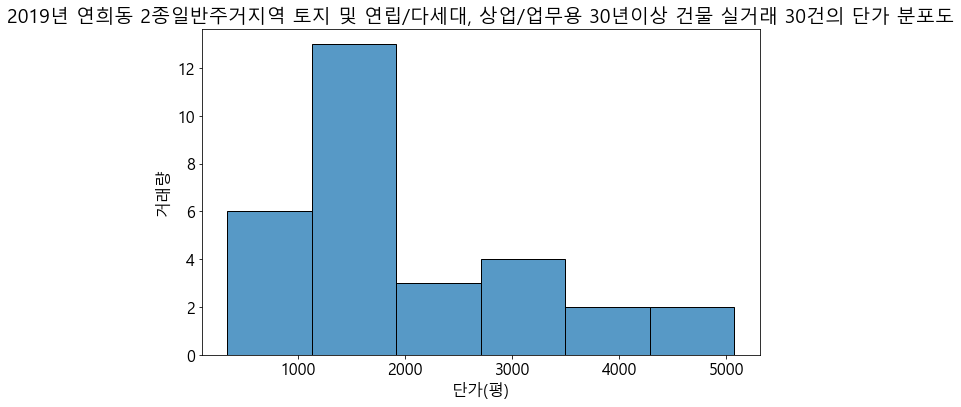

거래량: 30.0
평균: 1937.8596826484272
표준편차: 1177.0235050948897
최소: 334.5936234817814
25분위: 1298.6932585455625
중간값: 1576.4932134996334
75분위: 2572.390907013511
최대: 5079.200911458334


<Figure size 432x288 with 0 Axes>

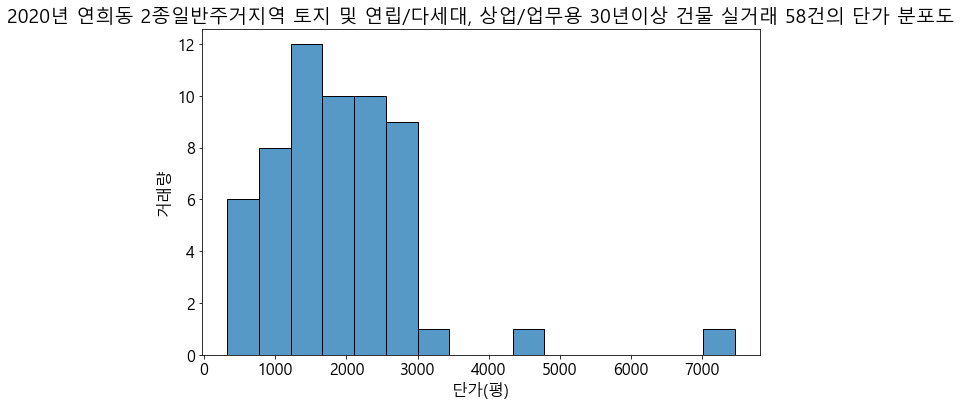

거래량: 58.0
평균: 1898.0856455044664
표준편차: 1081.0345249979532
최소: 326.4090414414415
25분위: 1282.379775516796
중간값: 1848.2291278074472
75분위: 2151.96386662536
최대: 7455.233880208334


<Figure size 432x288 with 0 Axes>

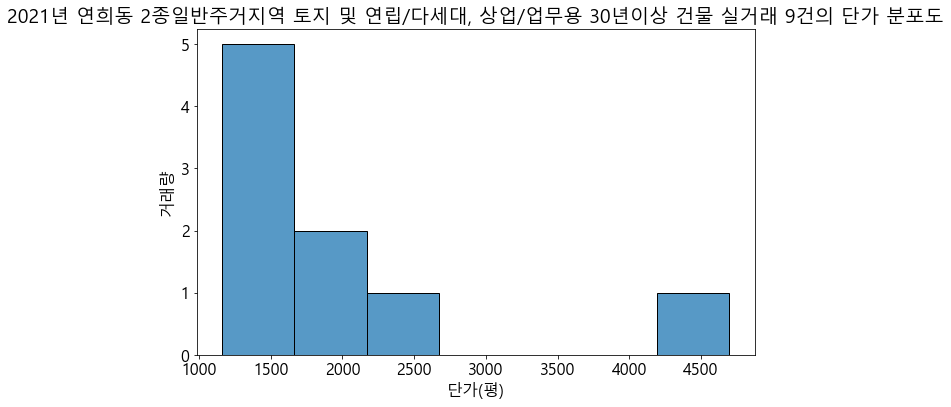

거래량: 9.0
평균: 2008.708009192703
표준편차: 1096.5268778607235
최소: 1159.9245614035087
25분위: 1333.1458097038435
중간값: 1638.265132743363
75분위: 1902.9142948512956
최대: 4697.385435168739


<Figure size 432x288 with 0 Axes>

In [16]:
for year in sorted(target_df['계약날짜'].dt.year.unique().tolist()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])